In [5]:
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

ZipImportError: bad local file header: '/Users/avinash/opt/anaconda3/lib/python3.7/site-packages/ndlib-5.0.2-py3.7.egg'

In [ ]:
graph_simple = nx.erdos_renyi_graph(100, 0.4)
#graph_simple = nx.to_undirected(graph_simple)
nx.draw(graph_simple, with_labels=True)

In [6]:
model = ep.SEIRModel(graph_simple)

In [7]:
import json
print(json.dumps(model.parameters, indent=2))

{
  "model": {
    "alpha": {
      "descr": "Latent period (1/duration)",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "beta": {
      "descr": "Infection rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "gamma": {
      "descr": "Recovery rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "tp_rate": {
      "descr": "Whether if the infection rate depends on the number of infected neighbors",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 1
    }
  },
  "nodes": {},
  "edges": {}
}


In [9]:
model.available_statuses

{'Susceptible': 0, 'Exposed': 2, 'Infected': 1, 'Removed': 3}

In [46]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.005)
cfg.add_model_parameter('alpha', 0.05)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

In [47]:
iterations = model.iteration_bunch(200)

100%|██████████| 200/200 [00:01<00:00, 102.71it/s]


In [103]:
model.get_status_map()

{'Susceptible': 0, 'Exposed': 2, 'Infected': 1, 'Removed': 3}

In [48]:
trends = model.build_trends(iterations)

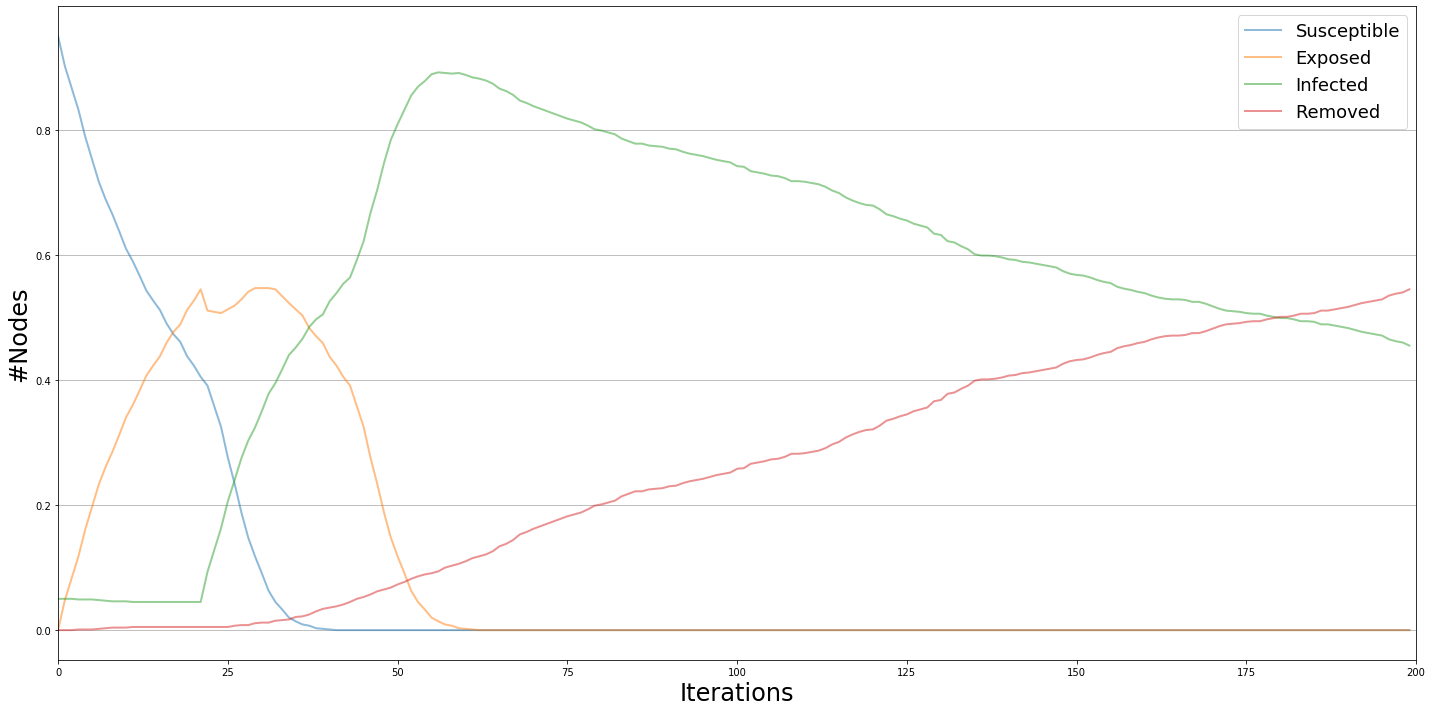

In [49]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [91]:

for st in trends[-1]:
    for k in trends[-1][st]['node_count']:
        print(trends[-1][st]['node_count'][k])
        

[950, 902, 867, 832, 789, 753, 717, 689, 665, 638, 610, 590, 567, 543, 527, 512, 490, 473, 461, 438, 423, 405, 391, 358, 325, 276, 234, 188, 148, 118, 91, 63, 45, 33, 20, 14, 9, 7, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 48, 83, 118, 161, 197, 233, 261, 285, 312, 340, 360, 383, 407, 423, 438, 460, 477, 489, 512, 527, 545, 511, 509, 507, 513, 519, 529, 541, 547, 547, 547, 545, 534, 523, 513, 503, 483, 470, 459, 437, 423, 405, 391, 358, 325, 276, 234, 188, 148, 118, 91, 63, 45, 33, 20, 14, 9, 7, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [88]:
for st in trends[-1]:
    infected_nodes = trends[-1][st]['node_count'][1]
    exposed_nodes = trends[-1][st]['node_count'][2]
    recovered_nodes = trends[-1][st]['node_count'][3]

In [97]:
len(recovered_nodes)

200

In [100]:
iterations[1]

{'iteration': 1,
 'status': {29: 2,
  32: 2,
  40: 2,
  87: 2,
  92: 2,
  112: 2,
  121: 2,
  137: 2,
  186: 2,
  209: 2,
  217: 2,
  254: 2,
  275: 2,
  290: 2,
  298: 2,
  306: 2,
  323: 2,
  387: 2,
  393: 2,
  410: 2,
  412: 2,
  414: 2,
  442: 2,
  457: 2,
  468: 2,
  550: 2,
  557: 2,
  563: 2,
  564: 2,
  627: 2,
  645: 2,
  692: 2,
  700: 2,
  712: 2,
  718: 2,
  755: 2,
  773: 2,
  791: 2,
  808: 2,
  832: 2,
  841: 2,
  850: 2,
  869: 2,
  873: 2,
  930: 2,
  932: 2,
  952: 2,
  981: 2},
 'node_count': {0: 902, 2: 48, 1: 50, 3: 0},
 'status_delta': {0: -48, 2: 48, 1: 0, 3: 0}}